In [8]:
% matplotlib inline
from sensor_data_analysis_api import *
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

In [9]:
room = 'Rm-4226'
dataDF = get_signal_dataframe(room, mean_type="5minutes" , use_weather_data=False).dropna()

Read file:  506_0_3001981.csv
Read file:  506_0_3001987.csv
Read file:  506_0_3001985.csv
Read file:  506_0_3001984.csv
Read file:  506_0_3001986.csv
Read file:  506_1_3001989.csv
Read file:  506_1_3015755.csv
Read file:  506_1_3001991.csv
Read file:  506_1_3001988.csv
Read file:  506_1_3001994.csv
Read file:  506_1_3001993.csv
Read file:  506_1_3001996.csv
Read file:  506_1_3001990.csv
Read file:  506_1_3001992.csv
Read file:  506_1_3001995.csv
Read file:  506_14_3001999.csv


## K Mean Clustering on the Room Data

##### Step 1 : Define kmeans to provide the cluster and its centers
##### Step 2 : Calculate RMS Error based on the Predictions and evaluate the clustering Effectiveness
##### Step 3 : Evaluate the right k value plotting the RMS error on a elbow curve
##### Step 4 : Based on the elbow curve below, k = 4 is the most ideal
##### Step 5 : Now using k=4 Run the k means cluster again and determine the cluster each row in the dataframe belongs to
##### Step 6 : Using Each Cluster , now run them through PCA for 1 of the signals "Zone Temperature" to understand the patterns on each cluster

In [10]:
def performKmeans(n_clusters, dataDF):
    # Initialize the kmeans
    kmeans = KMeans(n_clusters=n_clusters)

    # classify the data in to clusters
    predicted = kmeans.fit_predict(dataDF)
    
    return predicted, kmeans.cluster_centers_

def calculateRMSE(original_df, labels, centers):
    labels_df = pd.DataFrame(labels, columns=['cluster'])
    clustered_df = labels_df.merge(pd.DataFrame(centers), left_on='cluster', right_index=True, how='left')
    return mean_squared_error(original_df, clustered_df.iloc[:, 1:])   

In [13]:
error_list = []
for n in range(1, 10):
    predicted, centers = performKmeans(n, dataDF.iloc[:, 2:])
    err = calculateRMSE(dataDF.iloc[:, 2:], predicted, centers)
    error_list.append(err)
    print "Kmeans performed for n = ", n

pd.Series(error_list)

Kmeans performed for n =  1
Kmeans performed for n =  2
Kmeans performed for n =  3
Kmeans performed for n =  4
Kmeans performed for n =  5
Kmeans performed for n =  6
Kmeans performed for n =  7
Kmeans performed for n =  8
Kmeans performed for n =  9


0    8850.590529
1    3267.597879
2    1916.991510
3     880.868002
4     686.481268
5     497.754699
6     397.829074
7     323.208548
8     261.229966
dtype: float64

#### We can find from the elbow curve that 4 is the ideal k value(number of clusters)

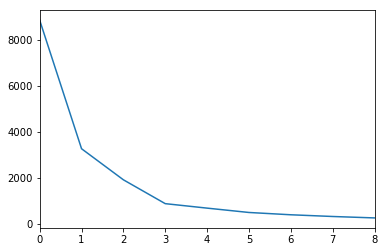

In [14]:
pd.Series(error_list).plot()

#### This cell individually plots each of the 4 clusters that we segregated in the previous on a PCA data with 9 components.

Exception for :  Zone Temperature
Exception for :  Zone Temperature


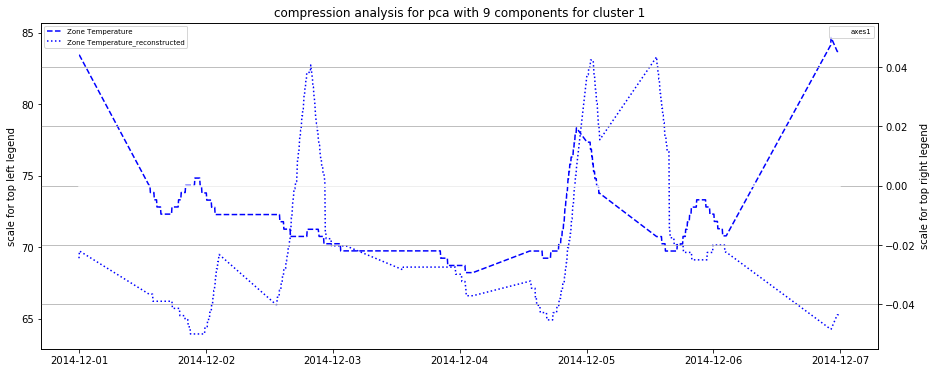

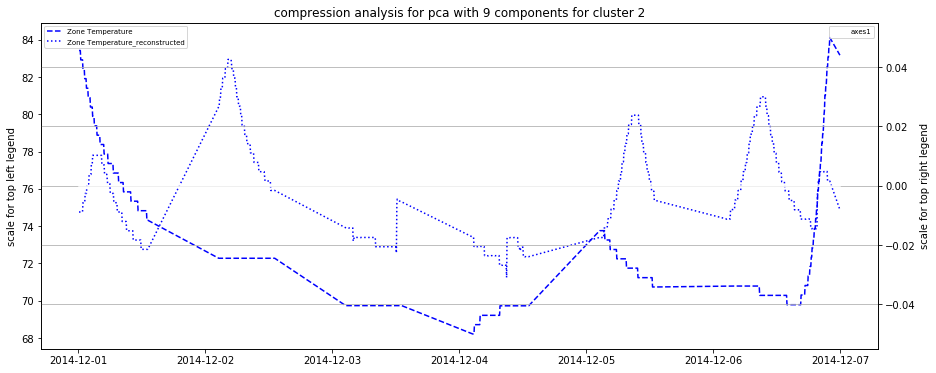

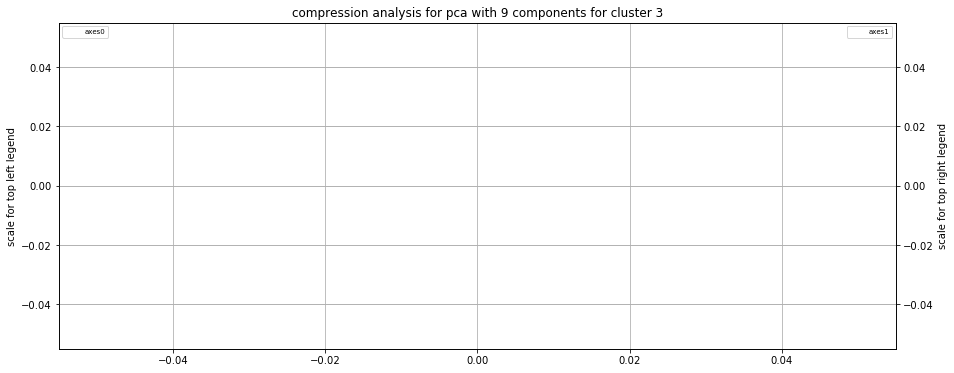

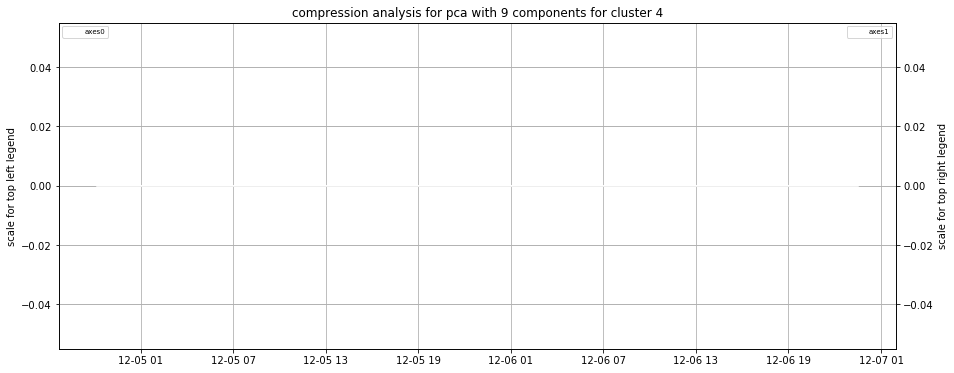

In [45]:
ncluster = 4
predicted, centers = performKmeans(ncluster, dataDF.iloc[:, 2:])
dataDFPred = dataDF
dataDFPred['cluster'] = predicted
dataDF_clus1 = dataDFPred[dataDFPred.cluster == 0]
dataDF_clus2 = dataDFPred[dataDFPred.cluster == 1]
dataDF_clus3 = dataDFPred[dataDFPred.cluster == 2]
dataDF_clus4 = dataDFPred[dataDFPred.cluster == 3]

n_components = 9
dataframes = [dataDF_clus1,dataDF_clus2,dataDF_clus3,dataDF_clus4]
for i in range(0,len(dataframes)):
    [dfs, plotTemplates, compressed] = CompressWithPCA(dataframes[i], stTime='2014-12-01', enTime='2014-12-07', n_components = 9)
    plotResults(dfs, plotTemplates, method='pca with %d components for cluster %d'%(n_components,i+1))